# Lab1 - Data Exploration
## Abeer Ahmad (38) - Mohammed Deifallah (59)
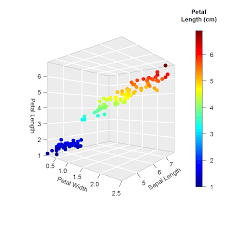

# TCP Reliable Data Transport Protocol
Here's our own implementation for both socket and reliable transport layers.

*Reliable transport protocol runs on top of an unreliable delivery mechanism.*

## RDT methods
### Stop and Wait
Simply, the server sends only one packet until it receives the successful acknowledgement from the client.

### Selective Repeat
Implementation for one of the most common pipelining methods, where the server sends up to $N$ packets with associated timers for each individual packet.
This method is practical as it doesn't work by `cumulative acknowledgements` like **GBN**, mentioned later. Otherwise, it only sends unacknowledged packets.

### Go-Back-In (GBN)
It works like the previous method, except that the whole window has only one timer because it works by `cumulative acknowledgements`, so in case of packet loss, it retransmits the whole window again.

## Congestion Control
**TCP** is well-known for it's congestion control process as shown in the state diagram shown below.

## Packet Loss Simulation
The system is given a packet loss propability in the configuration file. This *PLP* ranges from $0$ to $1$, where PLP% of the packets are considered lost. In addition, a seed value for the random generator is also given to select the indices of lost packets.

## Prerequisite installed
- C++11 or higher compiler.

## Authors
* **Amr Hendy** [AmrHendy](https://github.com/AmrHendy)
* **Arsanous Essa** [Arsanous](https://github.com/Arsanuos)
* **Mohammed Deifallah** [Mohammed-Deifallah](https://github.com/Mohammed-Deifallah)

## License
This project is licensed under the MIT License - see the [LICENSE](LICENSE) file for details

## Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

## Download and Read Data
Loading the iris dataset, where X = iris.data and y = iris.target.

In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Dataset Structure

In [17]:
print('Iris Dataset has ' + str(X.shape[0]) + ' samples.')
print('Iris Dataset has ' + str(len(iris.feature_names)) + ' features:')
for i in range(len(iris.feature_names)):
  print('\t-' + iris.feature_names[i])
print('Iris Dataset has ' + str(len(iris.target_names)) + ' classes as target values:')
for i in range(len(iris.target_names)):
  print('\t-' + iris.target_names[i] + ' has ' + str(len(X[y == i])) + ' samples.')

Iris Dataset has 150 samples.
Iris Dataset has 4 features:
	-sepal length (cm)
	-sepal width (cm)
	-petal length (cm)
	-petal width (cm)
Iris Dataset has 3 classes as target values:
	-setosa has 50 samples.
	-versicolor has 50 samples.
	-virginica has 50 samples.


### Looking into the data

In [18]:
iris_df = pd.DataFrame(data= np.c_[X, iris.target_names[y]],
                     columns= iris.feature_names + ['target'])
X_df = pd.DataFrame(X, columns = iris.feature_names)

In [19]:
display(iris_df.head(len(iris_df)))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


---
**Comments:**
*  **Data examples are grouped by class labels.**



## Cosine Similarity
The `Cosine similarity` is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them: *`(X, Y) = <X, Y> /(||X||∗||Y||)`*.

The following code computes the cosine similarity matrix for the Iris data set.

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X)

In [21]:
display(pd.DataFrame(similarity_matrix))

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,0.998579,0.999987,0.999101,0.999758,0.999003,0.999080,0.999780,0.999135,0.998765,...,0.878256,0.898527,0.873442,0.875613,0.878619,0.889556,0.880900,0.891786,0.883909,0.886703
1,0.998579,1.000000,0.998791,0.998794,0.997241,0.996926,0.996280,0.998914,0.999261,0.999652,...,0.890779,0.910913,0.886141,0.888069,0.890219,0.902233,0.895512,0.904150,0.893800,0.897874
2,0.999987,0.998791,1.000000,0.999217,0.999668,0.999039,0.999036,0.999828,0.999283,0.998908,...,0.880203,0.900400,0.875362,0.877528,0.880518,0.891478,0.882910,0.893629,0.885669,0.888459
3,0.999101,0.998794,0.999217,1.000000,0.998717,0.999135,0.998696,0.999769,0.999939,0.999386,...,0.895960,0.914286,0.892022,0.893886,0.896240,0.906172,0.898580,0.908769,0.901235,0.904442
4,0.999758,0.997241,0.999668,0.998717,1.000000,0.999300,0.999603,0.999465,0.998530,0.997753,...,0.875597,0.895504,0.870877,0.873099,0.876379,0.886585,0.877238,0.889024,0.882401,0.884658
5,0.999003,0.996926,0.999039,0.999135,0.999300,1.000000,0.999869,0.999263,0.998869,0.997372,...,0.891317,0.909722,0.886582,0.888815,0.892324,0.901445,0.891902,0.903509,0.898201,0.899592
6,0.999080,0.996280,0.999036,0.998696,0.999603,0.999869,1.000000,0.999090,0.998352,0.996868,...,0.884458,0.903236,0.879704,0.881982,0.885611,0.894749,0.884848,0.896983,0.891897,0.893230
7,0.999780,0.998914,0.999828,0.999769,0.999465,0.999263,0.999090,1.000000,0.999756,0.999318,...,0.887011,0.906331,0.882657,0.884667,0.887325,0.897779,0.889682,0.900220,0.892474,0.895517
8,0.999135,0.999261,0.999283,0.999939,0.998530,0.998869,0.998352,0.999756,1.000000,0.999617,...,0.895918,0.914588,0.891798,0.893684,0.896018,0.906376,0.898960,0.908775,0.900668,0.904006
9,0.998765,0.999652,0.998908,0.999386,0.997753,0.997372,0.996868,0.999318,0.999617,1.000000,...,0.890901,0.910270,0.887058,0.888787,0.890522,0.901835,0.895416,0.904532,0.894706,0.899227


---
**Comments:**
- **Diagonal values are all 1's indicating maximum similarity; since each data sample is being compared to itself.**
- **Higher similarities are found among each 50 samples belonging to the same class.**
- **The matrix is symmetric, where matrix[i, j] = matrix[j, i] for i=[0, 149], j=[0,149].**

### Similarity Matrix Visualization

In [22]:
def heatmap(data, row_labels, row_intervals, col_labels, col_intervals,
            yticklabel_size=10, xticklabel_size=10, rotate=False, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    # If 'ax' in not passed, get the current Axes instance on the current
    # figure matching the given keyword args, or create one.
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04, **cbar_kw) # 'fraction' and 'pad' properties are for the colorbar alignment
    cbar.ax.set_ylabel(cbarlabel, size=18, rotation=-90, va="bottom") # 'weight' property can be used for bold text (weight='bold')
    
    # We want to show ticks at the middle of each class...
    ax.set_xticks(col_intervals) # np.arange: returns evenly spaced values within a given interval
    ax.set_yticks(row_intervals)
    # ... and label them with the respective classes.
    ax.set_xticklabels(col_labels, size=16)
    ax.set_yticklabels(row_labels, size=16)
        
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    # If rotate is true, rotate the xtick labels and set their alignment.
    if rotate:
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")
    
    ax.grid('off')
    
    return im, cbar

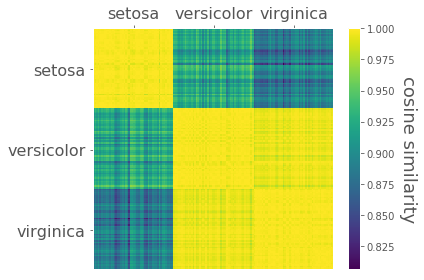

In [23]:
intervals = np.arange(25, 175, 50);
classes = iris.target_names
fig, ax = plt.subplots()
im, cbar = heatmap(similarity_matrix, classes, intervals, classes, intervals,
                   yticklabel_size=16, xticklabel_size=16, ax=ax,
                   cmap="viridis", cbarlabel="cosine similarity")

fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

---
**Comments:**
- **It is verified that similarity reaches its highest values within class samples.**
- **'Setosa' is more distinguishable that both other types.**

## Visualization

### Individual plots
Plot the X data for each class alone.

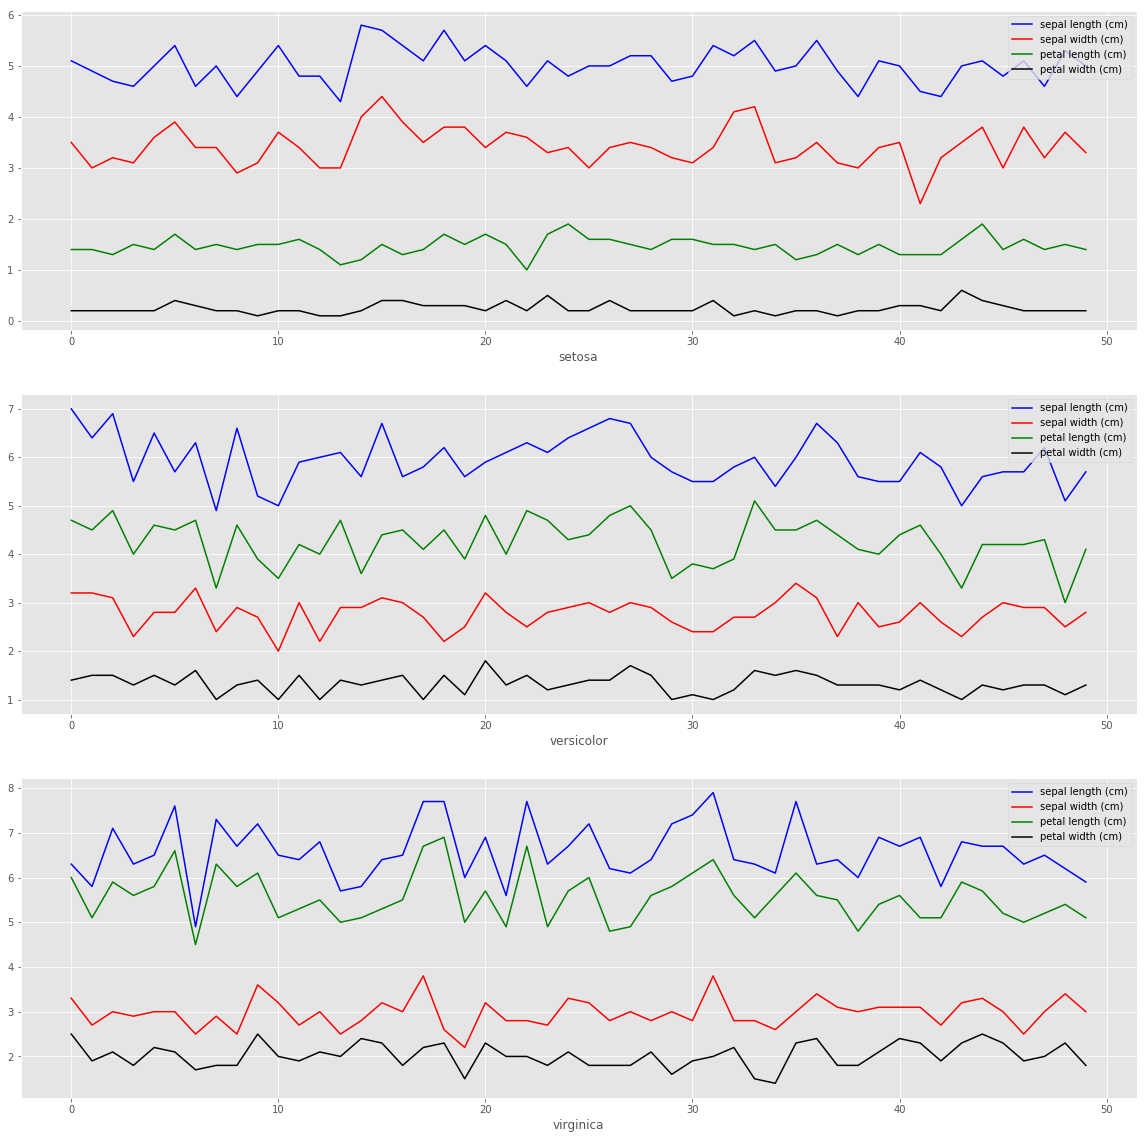

In [24]:
fig, axes = plt.subplots(nrows= 3, ncols=1, figsize=(20,20))
colors= ['blue', 'red', 'green', 'black']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.feature_names)), colors):
        ax.plot(X[y==i, label], label=iris.feature_names[label], color=color)
        ax.set_xlabel(iris.target_names[i])  
        ax.legend(loc='upper right')
        
plt.show()

Text(0,0.5,'feature value')

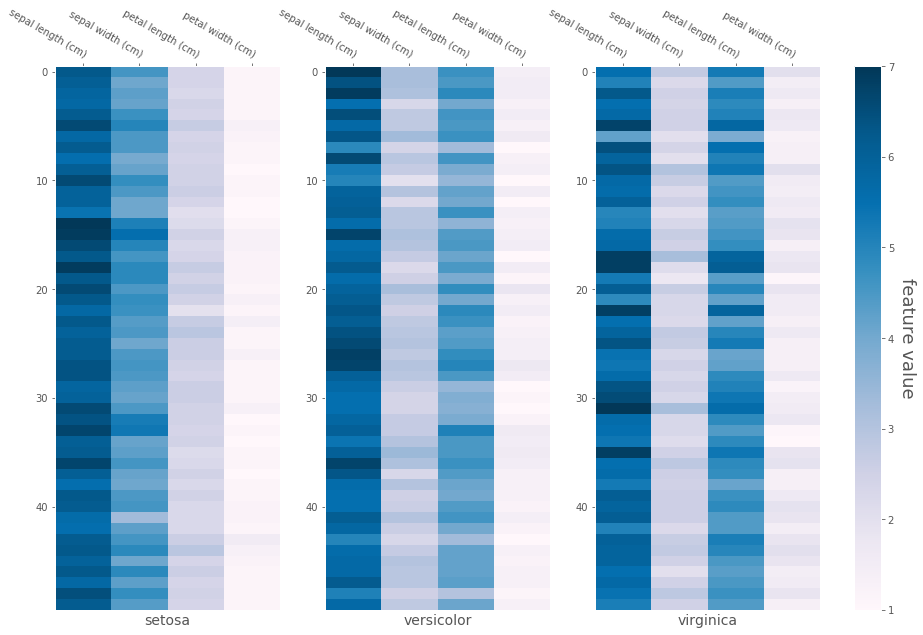

In [25]:
class_size = 50
features = iris.feature_names

plt.rcParams["figure.figsize"] = [15, 10]
fig, ax = plt.subplots(nrows=1, ncols=3)
images = []

for i, axes in enumerate(ax.flat): # for each feature (subplot)
    start = i * class_size
    images.append(axes.imshow(X[start:start+class_size, :], cmap="PuBu", aspect='auto'))
    axes.set_xticks(np.arange(4)) # np.arange: returns evenly spaced values within a given interval
    axes.set_xticklabels(features)
    axes.set_xlabel(classes[i], size=14)
    axes.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(axes.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
    axes.grid('off')

cbar = fig.colorbar(images[1], ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("feature value", size=18, rotation=-90, va="bottom") # 'weight' property can be used for bold text (weight='bold')

#plt.show()

---
**Comments:**
- **In the 'virginica' type, both sepal and petal length have very near values. Same goes for sepal and petal width.**
- **Again, 'Setosa' seems to have a different combination of feature values than the other two types.**

### Individual Histogram
Plot the histogram for each class.

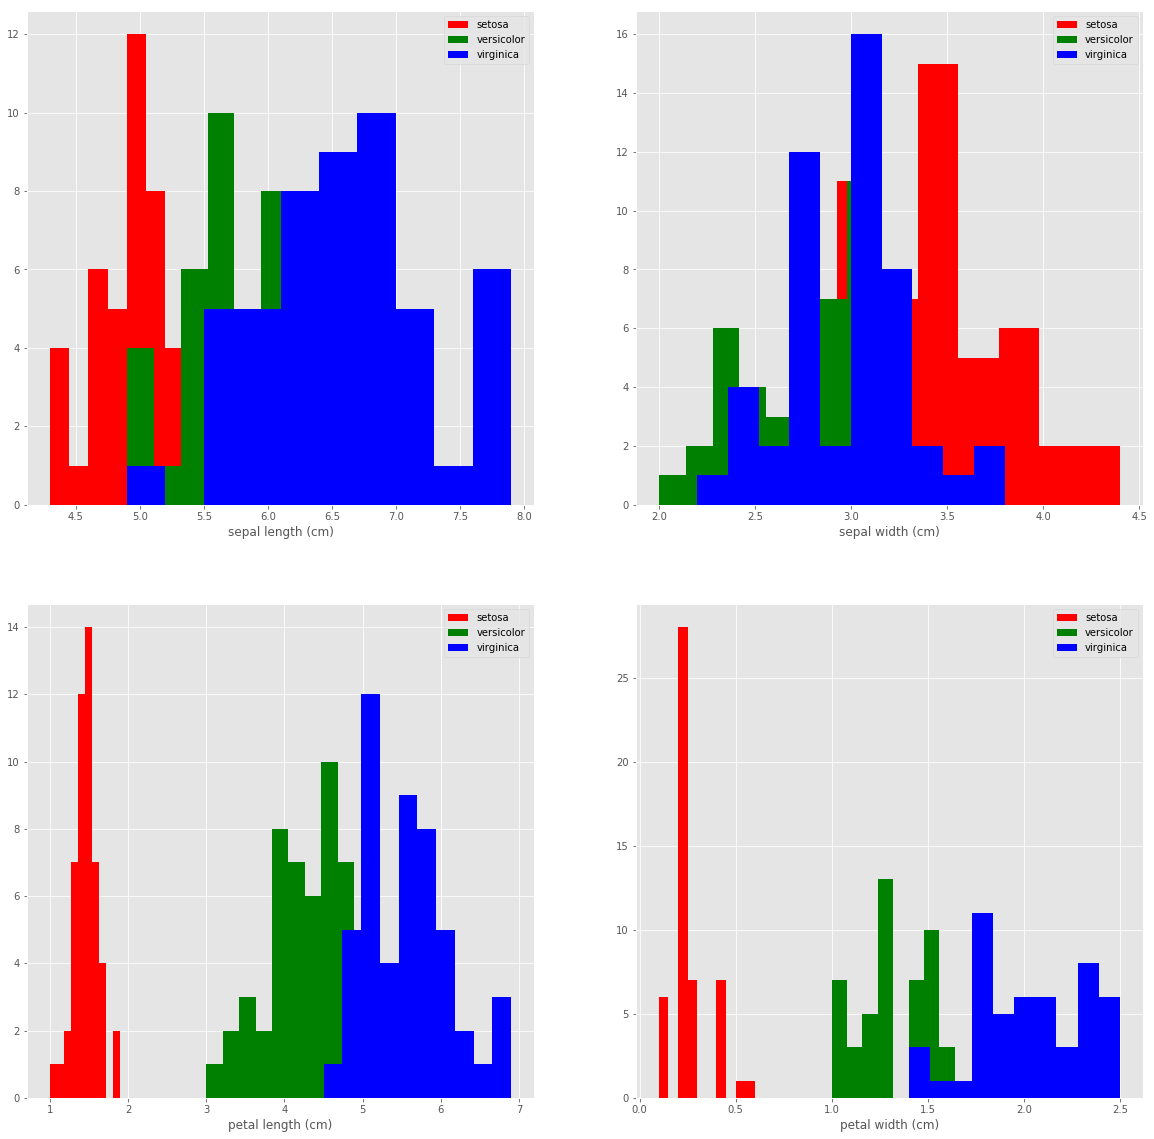

In [26]:
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(20,20))
colors= ['red', 'green', 'blue']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(X[y==label, i], label=iris.target_names[label], color=color)
        ax.set_xlabel(iris.feature_names[i])  
        ax.legend(loc='upper right')
        
plt.show()

---
**Comments:**
- **Both petal characteristics can very much distinguish the 'Setosa' type.**

### 2D Scatter Plot
Use scatter plot to plot every 2 attributes together.

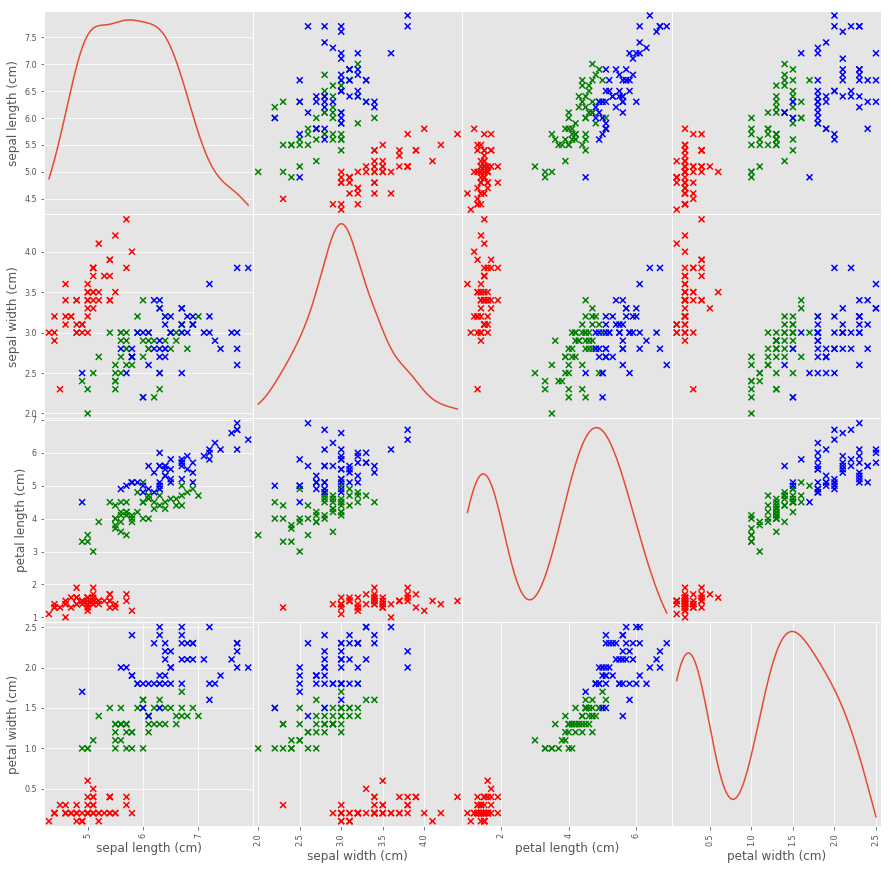

In [27]:
#scatter_matrix(X_df, alpha=1, figsize=(15, 15), c=y)
scatter_matrix(X_df, alpha=1, figsize=(15, 15), marker="x", diagonal='kde', color=np.array(50*['r']+50*['g']+50*['b']))
plt.show()

---
**Comments:**
*   **Both sepal features have a Gaussian distribution.**
*   **The petal length has a high positive correlation with both sepal length and petal width.**
*   **Again, 'Setosa' class is shown to be linearly separable from the other ones.**

### 3D Scatter Plot
Use 3D scatter plot to plot every 3 attributes together.

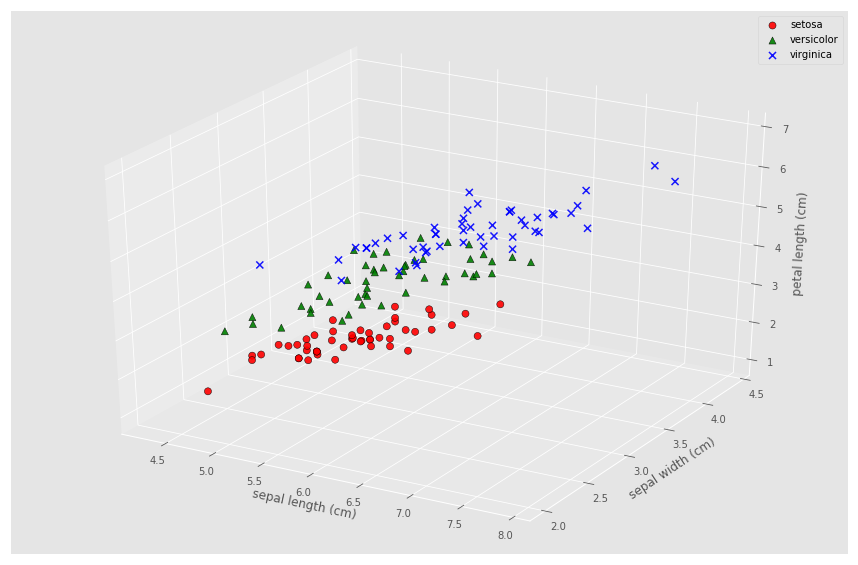

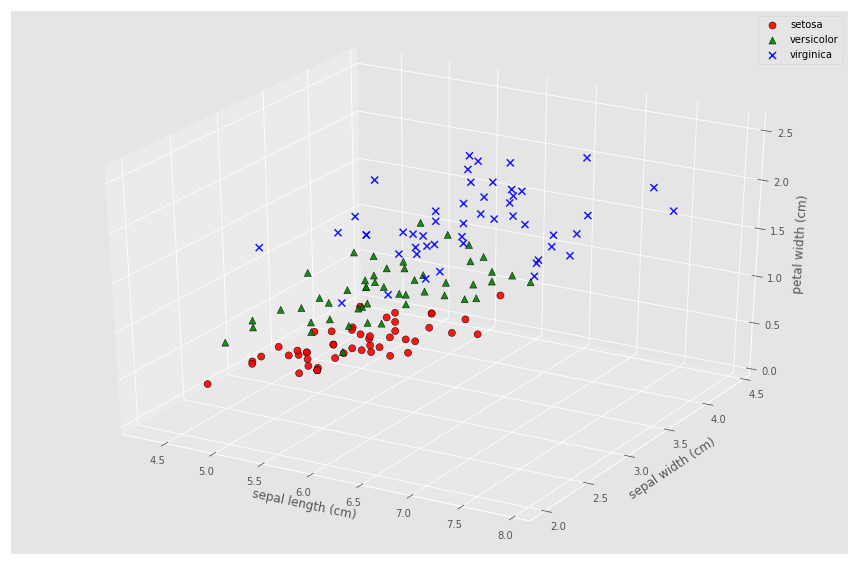

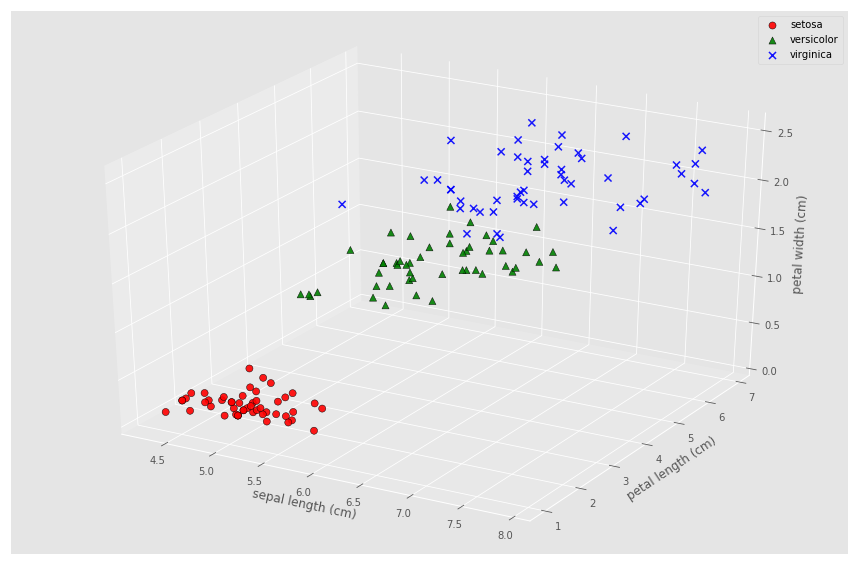

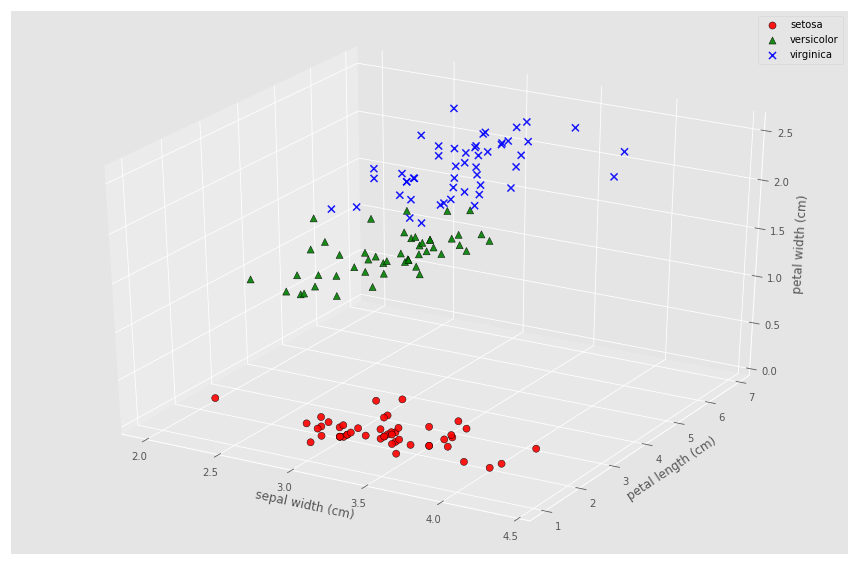

In [28]:
n = len(iris.feature_names)
#Function scatter_plot group data by argument name, plot and edit labels
def scatter_plot(i, j, k):
    grafico = plt.figure().gca(projection='3d')
    colors = ['red', 'green', 'blue']
    markers = ['o', '^', 'x']
    for label, color, marker in zip(range(len(iris.target_names)), colors, markers):
        grafico.scatter(X[y==label, i], X[y==label, j], X[y==label, k],color=color, edgecolors='k', s=50, alpha=0.9, marker=marker, label=iris.target_names[label])
    grafico.set_xlabel(iris.feature_names[int(i)])
    grafico.set_ylabel(iris.feature_names[int(j)])
    grafico.set_zlabel(iris.feature_names[int(k)])
    plt.legend()
    plt.show()
    return 

for i in range(0, n - 2):
    for j in range(i + 1, n - 1):
        for k in range(j + 1, n):
            scatter_plot(i, j, k)

---
**Comments:**
*   **There is an intuition that maybe 3 features may be correlated [1, 2], but this cannot be told for sure; due to the extra plot complexity when dealing with 3-dimensional space.**
*   **Discrimination between the iris classes is more evident when exploiting more features.**